# Tarea 3

## Librerías

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

## Bases de datos

In [2]:
ttc = pd.read_csv('train_transaction.csv', low_memory=False)
tic = pd.read_csv('train_identity.csv', low_memory=False)
tstc = pd.read_csv('test_transaction.csv', low_memory=False)
tstic = pd.read_csv('test_identity.csv', low_memory=False)

In [3]:
def reduce_mem_usage(df):
    numv = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2 
    for col in df.columns:
        vt = df[col].dtypes
        if vt in numv:
            max_c = df[col].max()
            min_c = df[col].min()
            if str(vt)[:3] == 'int':
                if min_c > np.iinfo(np.int8).min and max_c < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif min_c > np.iinfo(np.int16).min and max_c < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif min_c > np.iinfo(np.int32).min and max_c < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif min_c > np.iinfo(np.int64).min and max_c < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if min_c > np.finfo(np.float16).min and max_c < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif min_c > np.finfo(np.float32).min and max_c < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                elif min_c > np.finfo(np.float64).min and max_c < np.finfo(np.float64).max:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
ttc = reduce_mem_usage(ttc)
tic = reduce_mem_usage(tic)
tstc = reduce_mem_usage(tstc)
tstic = reduce_mem_usage(tstic)

Mem. usage decreased to 542.35 Mb (69.4% reduction)
Mem. usage decreased to 25.86 Mb (42.7% reduction)
Mem. usage decreased to 472.59 Mb (68.9% reduction)
Mem. usage decreased to 25.44 Mb (42.7% reduction)


In [5]:
train = pd.merge(ttc, tic, on = 'TransactionID', how = 'left')
test = pd.merge(tstc, tstic, on = 'TransactionID', how = 'left')

## Plot 

(array([569877.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  20663.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

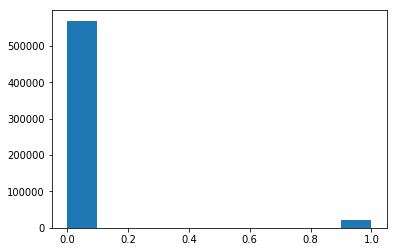

In [8]:
plt.hist(train["isFraud"])

## Separando data train

In [9]:
valid = train.sample(frac=0.01)
train = train.drop(test.index)

## Separando variable dependiente de las independientes

In [10]:
y_train = train.pop("isFraud")
X_train = train

y_valid = valid.pop("isFraud")
X_valid = valid

X_test = test

## Pre procesamiento de la base

Solo variables numéricas

In [11]:
X_train = X_train.select_dtypes([np.number])
X_valid = X_valid.select_dtypes([np.number])
X_test = X_test.select_dtypes([np.number])

Imputación de datos

In [12]:
X_train = X_train.fillna(X_train.mean())
X_valid = X_valid.fillna(X_valid.mean())
X_test = X_test.fillna(X_test.mean())

Normalizacion de variables

In [13]:
scaler = preprocessing.StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

C:\Users\Alee Moraga\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float16, int16, int32, float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Alee Moraga\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float16, int16, int32, float32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Alee Moraga\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float16, int16, int32, float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Alee Moraga\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float16, int16, int32, float32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Alee Moraga\Anaconda3\l

## Modelo 

Modelo de Regresión logística

In [15]:
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)
clf.score(X_valid, y_valid)

0.9671464860287892